# Time Series Analysis Using ARIMA

time series forecasting can be done using stats-models
in time series prediction, prediction wil be based on just previous data

ARIMA - auto regression integrated moving average

auto regression (p) - 

moving average (q) - 

Integrated (d) - differentiating part, 

S-ARIMA
S means Seasonal - just what it implies i.e. lets say in summer electronics sales is high, in rainy season it is not, so that is seasonal.
E.G. sales of ice creams

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
data = pd.read_csv("./Datasets/portland.csv")
data.columns = ['Month', 'Sales']
data.head()

,Month,Sales
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [10]:
data.shape

(115, 2)

In [11]:
data.isnull().sum()

Month    0
Sales    0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   115 non-null    object
 1   Sales   115 non-null    object
dtypes: object(2)
memory usage: 1.9+ KB


In [13]:
#converting date to a proper format
data['Month'] = pd.to_datetime(data['Month'], errors='coerce', format='%Y-%m')

In [8]:
data

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
0,1960-01-01,648
1,1960-02-01,646
2,1960-03-01,639
3,1960-04-01,654
4,1960-05-01,630
...,...,...
110,1969-03-01,1419
111,1969-04-01,1432
112,1969-05-01,1394
113,1969-06-01,1327


In [14]:
data.dtypes

Month    datetime64[ns]
Sales            object
dtype: object

In [15]:
data.isnull().sum()

Month    1
Sales    0
dtype: int64

In [17]:
#dropping the null values from the month column
data.dropna(subset=['Month'], inplace = True)

In [18]:
data.isnull().sum()

Month    0
Sales    0
dtype: int64

In [19]:
#converting month as the index for the data

data.set_index('Month', inplace = True)
data.head()

,Sales
Month,
1960-01-01,648
1960-02-01,646
1960-03-01,639
1960-04-01,654
1960-05-01,630


In [20]:
#converting the Sales columns from object type to integer
data['Sales'] = data['Sales'].astype(int)
data.dtypes

Sales    int32
dtype: object

<AxesSubplot:xlabel='Month'>

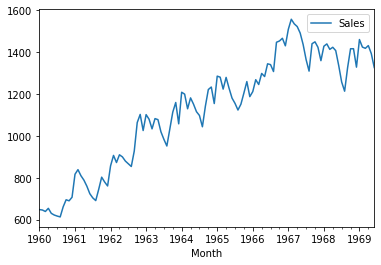

In [21]:
data.plot()

For ARIMA models Data must be stationary that is it must not change with time. i.e mean SD of the data must not change.

1. We can check using plot if the dat ais changing or not
2. We can use a statistical method called dickey-fuller method to check if data is stationary.

Hypothesis testing - if a product is to be launched, the comapany will survey a subset of the population because a survey by the whole population is not possible.
So lets say that the company surveys the 30% population in the area where it wants to sell the product and based on the outcomes of that survey, they decide and make plans for their product's sales. So this is called assumption hypothesis.

Null hypothesis - this assumes that the upcoming results will be same as the previous results so they dont bother soing the survey.
i.e. if a similar type of product is launched by the company it will assume that the new product will have the same success as the old one according to the previous survey.

Alternate hypothesis - if there is no null hypothesis then there will be an alternate hypothesis. The assumption that resists the idea of null hypothesis.

Rejection of hypothesis - rejection of hypothesis is when we sont have enough evidence to prove our hypothesis.

The level of significance - 

p-value - 

For SARIMA data needs to be seasonal

In [24]:
from statsmodels.tsa.stattools import adfuller


In [25]:
x = data['Sales']
result = adfuller(x)

print("ADF statistics", result[0])
print("\np-value", result[1])
print("critical values", result[5])

if result[1]<=0.05:
    print("fail to reject null hypothesis h1, it means data is stationary")

else:
    print("reject the null hypothesis, it means data is not stationary")

ADF statistics -1.53659714445316

p-value 0.5153358797821733
critical values 1028.4238367341432
reject the null hypothesis, it means data is not stationary


In [27]:
data['Sales first diff'] = data['Sales'] - data['Sales'].shift(1)
data.head()

,Sales,Sales first diff
Month,,
1960-01-01,648,NaN
1960-02-01,646,-2.0
1960-03-01,639,-7.0
1960-04-01,654,15.0
1960-05-01,630,-24.0


In [28]:
data['Sales first diff'].dropna(inplace=True)

<AxesSubplot:xlabel='Month'>

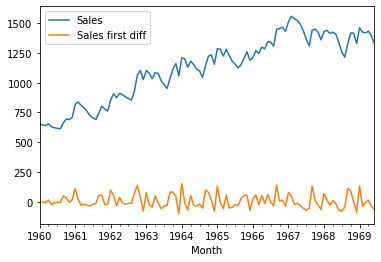

In [29]:
data.plot()

<AxesSubplot:xlabel='Month'>

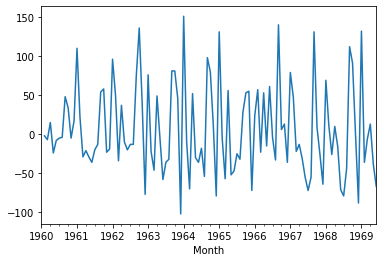

In [30]:
# we are checking if the data has become stationary or not
# we could also apply the ADF test
data['Sales first diff'].plot()

In [36]:
#since we did not get a stationary data we have again the same thing as above
data['Sales second diff'] = data['Sales'] - data['Sales'].shift(12)
data['Sales second diff'].dropna(inplace=True)
data.head()

,Sales,Sales first diff,Sales 12 diff,Sales second diff
Month,,,,
1960-01-01,648,NaN,NaN,NaN
1960-02-01,646,-2.0,NaN,NaN
1960-03-01,639,-7.0,NaN,NaN
1960-04-01,654,15.0,NaN,NaN
1960-05-01,630,-24.0,NaN,NaN


In [40]:
# data = data.drop('Sales 12 diff', axis = 1)
# data.head()

,Sales,Sales first diff,Sales second diff
Month,,,
1960-01-01,648,NaN,NaN
1960-02-01,646,-2.0,NaN
1960-03-01,639,-7.0,NaN
1960-04-01,654,15.0,NaN
1960-05-01,630,-24.0,NaN


<AxesSubplot:xlabel='Month'>

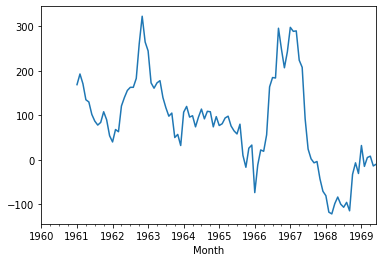

In [32]:
data['Sales second diff'].plot()

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

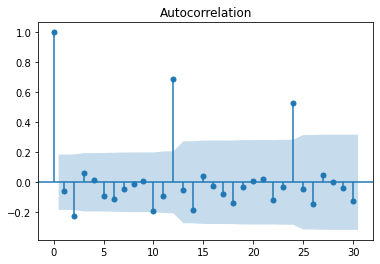

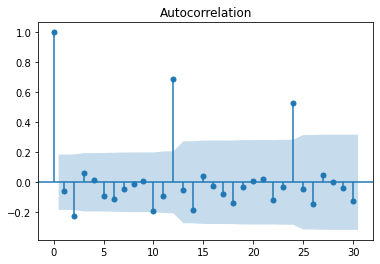

In [35]:
#from this we get the p value
# we will select the index of the value which closest to 0
#so according the below plot, the minimum index value closest to 0 is 2
#so our p value is 2
plot_acf(data['Sales first diff'].iloc[1: ], lags = 30)

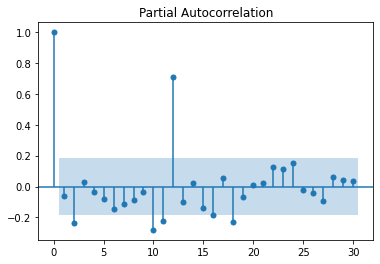

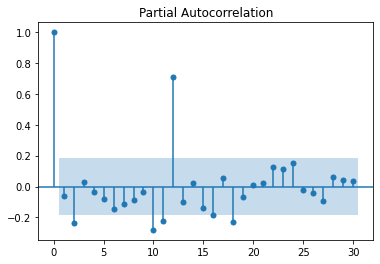

In [41]:
#from this we get the q value
# we will select the index of the value which closest to 0
#so according the below plot, the minimum index value closest to 0 is 2
#so our q value is 2
plot_pacf(data['Sales first diff'].iloc[1: ], lags = 30)

In [49]:
# plot_acf(data['Sales second diff'].iloc[1: ], lags = 30)

# ARMA model

In [43]:
from statsmodels.tsa.arima_model import ARMA

In [44]:
# order is a tuple of (p, q) values

model = ARMA(data['Sales'], order=(2, 2))
model_fit = model.fit()

c:\users\harshit\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\harshit\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No f

In [46]:
model_fit.summary()

c:\users\harshit\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  114
Model:                     ARMA(2, 2)   Log Likelihood                -625.241
Method:                       css-mle   S.D. of innovations             56.707
Date:                Fri, 02 Jul 2021   AIC                           1262.481
Time:                        19:45:04   BIC                           1278.899
Sample:                    01-01-1960   HQIC                          1269.144
                         - 06-01-1969                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1686.6788        nan        nan        nan         nan         nan
ar.L1.Sales     1.9980      0.000   5399.645      0.000       1.997       1.999
ar.L2.Sales    -0.9980      0.000  -2055.339      0.000      -0.999      -0.997
ma.L1.Sales    -1.0064      0.115     -8.753      0.000      -1.232      -0.781
ma.L2.Sales     0.0064      0.115      0.056      0.955      -0.218       0.231
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0010           -0.0066j            1.0010           -0.0010
AR.2            1.0010           +0.0066j            1.0010            0.0010
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2          156.0392           +0.0000j          156.0392            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Month'>

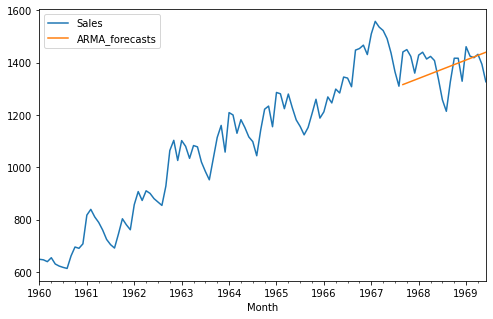

In [48]:
data['ARMA_forecasts'] = model_fit.predict(start = 92, end = 114, dynamic=True)

data[['Sales', 'ARMA_forecasts']].plot(figsize=(8, 5))

# ARIMA Model

In [50]:
from statsmodels.tsa.arima_model import ARIMA

In [56]:
#order a tuple of (p, q, d) values

model1 = ARIMA(data['Sales'], order=(2, 1, 2))
model_fit1 = model1.fit()

c:\users\harshit\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\harshit\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\harshit\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To sil

In [57]:
model_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  113
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -611.903
Method:                       css-mle   S.D. of innovations             54.314
Date:                Fri, 02 Jul 2021   AIC                           1235.807
Time:                        19:56:46   BIC                           1252.171
Sample:                    02-01-1960   HQIC                          1242.447
                         - 06-01-1969                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.7323      2.247      2.996      0.003       2.328      11.137
ar.L1.D.Sales     0.1449      0.274      0.530      0.596      -0.391       0.681
ar.L2.D.Sales     0.2776      0.238      1.167      0.243      -0.188       0.744
ma.L1.D.Sales    -0.2315      0.244     -0.949      0.343      -0.710       0.247
ma.L2.D.Sales    -0.5258      0.223     -2.355      0.019      -0.963      -0.088
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6548           +0.0000j            1.6548            0.0000
AR.2           -2.1768           +0.0000j            2.1768            0.5000
MA.1            1.1764           +0.0000j            1.1764            0.0000
MA.2           -1.6167           +0.0000j            1.6167            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Month'>

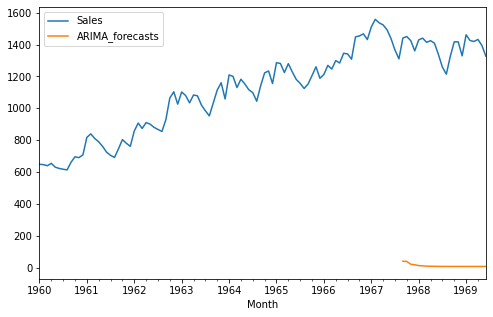

In [59]:
data['ARIMA_forecasts'] = model_fit1.predict(start = 92, end = 114, dynamic=True)

data[['Sales', 'ARIMA_forecasts']].plot(figsize=(8, 5))

# we see that ARIMA is not good for this dat aso we use the SARIMA model

# S-ARIMA

In [61]:
import statsmodels.api as sm

#seasonal_order is same as order except for the 4th value
# it is the season number, i.e. after how many 'number' the season changes
model_s = sm.tsa.statespace.SARIMAX(data['Sales'], order=(2, 1, 2), seasonal_order=(2, 1, 2, 6))
res = model_s.fit()

c:\users\harshit\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\harshit\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\harshit\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\harshit\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  w

<AxesSubplot:xlabel='Month'>

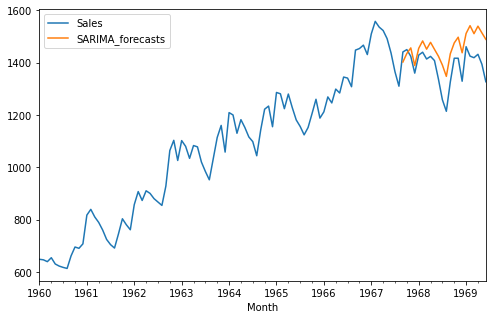

In [62]:
data['SARIMA_forecasts'] = res.predict(start = 92, end = 114, dynamic=True)

data[['Sales', 'SARIMA_forecasts']].plot(figsize=(8, 5))

## Future Predictions using SARIMA model

In [66]:
import datetime
from dateutil.relativedelta import relativedelta

In [69]:
start = datetime.datetime.strptime("1969-07-01", '%Y-%m-%d')

date_list = [start + relativedelta(months=x)  for x in range(0, 12)]
future_predictions = pd.DataFrame(index = date_list, columns = data.columns)
data = pd.concat([data, future_predictions])

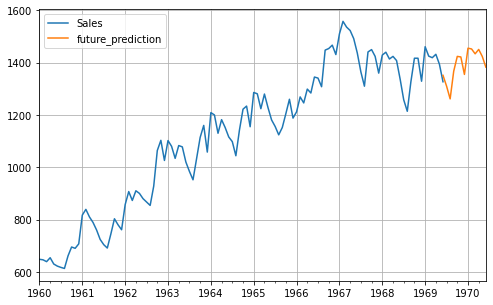

In [70]:
data['future_prediction'] = res.predict(start = 113, end = 130, dynamic=True)

data[['Sales', 'future_prediction']].plot(figsize=(8, 5))
plt.grid(True)